# Perkenalan

Nama : Febrian Hendifa

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Link

Link Dataset Kaggle:
https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam.csv&group=owned

Link Dashboard:
https://datastudio.google.com/reporting/cd0eb645-cfed-4eb8-afa9-de74ebd9574e


# Identifikasi Masalah

Disini saya menggunakan dataset "steam.csv" yang saya ambil datanya dari website kaggle, dimana steam ini merupakan sebuah aplikasi layanan distribusi digital video game yang paling banyak digunakan hingga saat ini.

Problem Statement : Mengetahui game apa saja yang banyak dimainkan dan game apa saja yang paling banyak dimiliki oleh user

Poin penjabaran:
1. Game mana dengan rata-rata waktu bermain paling banyak ?
2. Bagaimana tanggapan positif dan negatif pada setiap game ?
3. Siapa saja developer yang banyak mengeluarkan game ?
4. Platform mana saja yang memiliki banyak game ?
5. Berapa jumlah game yang dirilis setiap tahunnya ?
6. Game dengan genre apa saja yang paling sering dibuat ?
7. Apakah harga game mempengaruhi jumlah pemilik game ?

# Data Loading

In [5]:
df = pd.read_csv('steam.csv')

In [6]:
df.shape

(27075, 18)

In [3]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
df.tail()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19


In [4]:
df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

### Keterangan Kolom:
Appid - ID unik per judul game

Name - Nama video game

Release_date - Tanggal game ini dirilis

English - Video game dalam bahasa inggris

Developer - Nama perusahaan pembuat game

Publisher - Nama perusahaan penerbit game

Platforms - Platform game

Required_age - Usia disarankan untuk bermain game

Categories - Single player / Multiplayer games

Genres - Genre game

Steamspy_tags - Type game

Achievements - Jumlah pencapaian

Positive_ratings - Jumlah ulasan positif

Negative_ratings - Jumlah ulasan negatif

Average_playtime - Rata-rata waktu permainan dimainkan

Median_playtime - Median waktu permainan

Owners - Jumlah orang yang memiliki game

Price - Harga game

In [63]:
compression_opts = dict(method='zip',
                        archive_name='steam.csv')  
df.to_csv('steam.zip', index=False,
          compression=compression_opts)

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [6]:
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

Disini tidak ada data yang mengalami missing value semua data telah terisi jadi tidak ada data yang kosong atau null

In [23]:
df['release_date'] = df['release_date'].astype('datetime64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             27075 non-null  int64         
 1   name              27075 non-null  object        
 2   release_date      27075 non-null  datetime64[ns]
 3   english           27075 non-null  int64         
 4   developer         27075 non-null  object        
 5   publisher         27075 non-null  object        
 6   platforms         27075 non-null  object        
 7   required_age      27075 non-null  int64         
 8   categories        27075 non-null  object        
 9   genres            27075 non-null  object        
 10  steamspy_tags     27075 non-null  object        
 11  achievements      27075 non-null  int64         
 12  positive_ratings  27075 non-null  int64         
 13  negative_ratings  27075 non-null  int64         
 14  average_playtime  2707

Disini saya mengubah tipe data pada kolom "release_date" yang tadinya object sekarang saya ganti menjadi datetime

In [33]:
own = pd.DataFrame()
own[['lower', 'upper']] = df['owners'].str.split('-', expand = True)
own['lower'] = own['lower'].astype('int')
own['upper'] = own['upper'].astype('int')
own['owner_median'] = (own['lower'] + own['upper']) / 2
own

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,5000000,10000000,7500000.0
...,...,...,...
27070,0,20000,10000.0
27071,0,20000,10000.0
27072,0,20000,10000.0
27073,0,20000,10000.0


In [38]:
df['owner_median'] = own['owner_median']
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owner_median
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,15000000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,7500000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,7500000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,7500000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,7500000.0


Disini saya menambahkan kolom baru yang bernama "owner_median" dimana kolom ini saya ambil dari kolom owner dimana pada kolom owner saya buat dulu batas atas dan batas bawahnya setelah itu saya cari nilai mediannya dai batas atas dan batas bawah pad kolom owner

# Analisis dan perhitungan

In [ ]:
genres = ' '
for g in df['genres']:
  genres += g+' '

genres = list(set(genres.split(' ')))[1:]
genres

In [46]:
print (df['genres'].mode())

0    Action;Indie
Name: genres, dtype: object


Disini game dengan genre Action;Indie merupakan genre yang paling sering dibuat

In [66]:
df.sort_values(by = 'average_playtime', ascending = False).head(5)[['name', 'average_playtime']]

,name,average_playtime
9201,The Abbey of Crime Extensum,190625
1478,The Banner Saga: Factions,95245
6014,The Secret of Tremendous Corporation,95242
8969,PRICE,63481
3930,Boundless,55204


Text(0.5, 0.98, 'Average Playtime Rating')

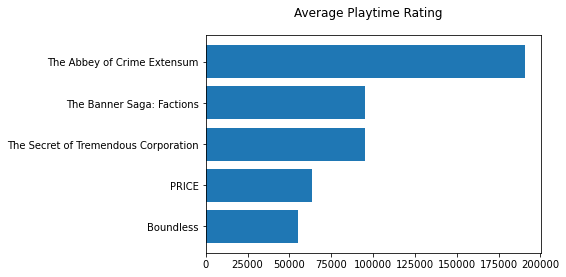

In [55]:
playtime = df.sort_values(by='average_playtime', ascending=False).iloc[:5]
playtimeRating = playtime['average_playtime']
positifNama = playtime['name']

plotFigure, plotRating = plt.subplots()
plotRating.barh(positifNama, playtimeRating)
plotRating.invert_yaxis()
plotFigure.suptitle('Average Playtime Rating')

Game "The Abbey of Crime Extensum" merupakan game dengan rata-rata waktu barmain paling banyak

In [6]:
print('Total Games:', df.shape[0])
print('Rata-rat waktu bermain game', df[df['average_playtime'] != 0].shape[0])

Total Games: 27075
Rata-rat waktu bermain game 6170


In [1]:
# calculation
6170/27075

0.22788550323176363

Ternyata disini hanya ada 22% saja game yang dimainkan dengan jumlah waktu bermain yang cuku lama

In [67]:
df['owner_median'].value_counts()

10000.0        18596
35000.0         3059
75000.0         1695
150000.0        1386
350000.0        1272
750000.0         513
1500000.0        288
3500000.0        193
7500000.0         46
15000000.0        21
35000000.0         3
75000000.0         2
150000000.0        1
Name: owner_median, dtype: int64

In [76]:
df.sort_values(by = 'owner_median', ascending = False).head(6)[['name', 'owner_median']]

,name,owner_median
22,Dota 2,150000000.0
25,Counter-Strike: Global Offensive,75000000.0
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000.0
19,Team Fortress 2,35000000.0
3362,Unturned,35000000.0
1634,Warframe,35000000.0


Game "Dota 2" merupaka game dengan jumlah pemilik terbanyak yaitu "150000000"

In [7]:
df.sort_values(by = 'positive_ratings', ascending = False).head(5)[['name', 'positive_ratings']]

,name,positive_ratings
25,Counter-Strike: Global Offensive,2644404
22,Dota 2,863507
19,Team Fortress 2,515879
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,496184
121,Garry's Mod,363721


Text(0.5, 0.98, 'Positive Ratings')

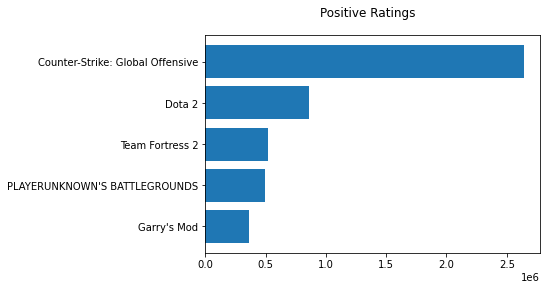

In [30]:
positifveUrut = df.sort_values(by='positive_ratings', ascending=False).iloc[:5]
positifRating = positifveUrut['positive_ratings']
positifNama = positifveUrut['name']

plotFigure, plotRating = plt.subplots()
plotRating.barh(positifNama, positifRating)
plotRating.invert_yaxis()
plotFigure.suptitle('Positive Ratings')

In [51]:
df.sort_values(by = 'negative_ratings', ascending = False).head(5)[['name', 'negative_ratings']]

,name,negative_ratings
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,487076
25,Counter-Strike: Global Offensive,402313
22,Dota 2,142079
2478,Grand Theft Auto V,139308
7809,Z1 Battle Royale,91664


Text(0.5, 0.98, 'Negative Ratings')

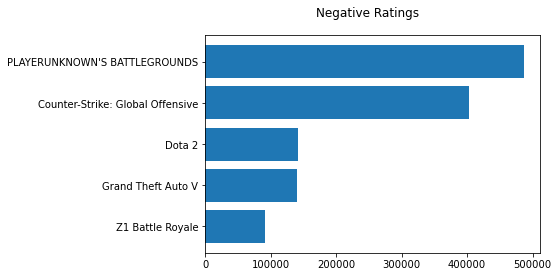

In [15]:
negativeUrut = df.sort_values(by='negative_ratings', ascending=False).iloc[:5]
negativeRating = negativeUrut['negative_ratings']
negativeNama = negativeUrut['name']

plotFigure, plotRating = plt.subplots()
plotRating.barh(negativeNama, negativeRating)
plotRating.invert_yaxis()
plotFigure.suptitle('Negative Ratings')

Game "Counter-Strike Global Offensive" merupakan game yang paling banyak disukai sengankan game "Playerunknown's Battlegrounds" merupakan game yang paling banyak tidak disukai.	

In [9]:
dev = df['developer'].str.split(';').reset_index()
dev = dev.explode('developer')
developer = dev['developer'].value_counts().reset_index()
developer

,index,developer
0,Choice of Games,94
1,"KOEI TECMO GAMES CO., LTD.",75
2,Ripknot Systems,62
3,"Nikita ""Ghost_RUS""",51
4,Laush Dmitriy Sergeevich,51
...,...,...
17948,TTCX Inc.,1
17949,Kipsaim(Mike) Delgado,1
17950,Default Interactive,1
17951,Broken Dreams,1


<AxesSubplot:title={'center':'developer dengan jumlah game terbanyak'}, xlabel='count', ylabel='developer'>

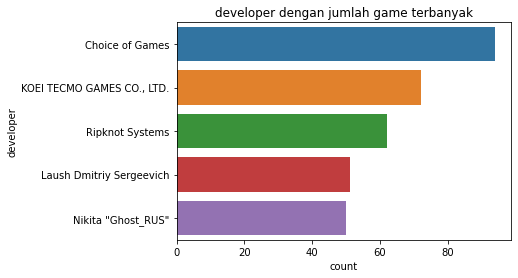

In [33]:
plt.title('developer dengan jumlah game terbanyak')

sns.countplot(y='developer', data=df, order=df.developer.value_counts().iloc[:5].index)

Developer Choice of Games merupakan developer yang paling banyak mengeluarkan game dengan jumlah 94 game

In [101]:
plat = df['platforms'].str.split(';').reset_index()
plat = plat.explode('platforms')
platforms = plat['platforms'].value_counts().reset_index()
platforms

,index,platforms
0,windows,27070
1,mac,8066
2,linux,5235


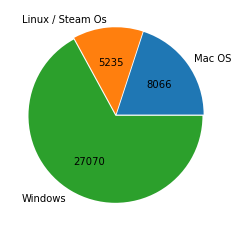

In [103]:
mac=len(df[df["platforms"].str.contains("mac")])
linux=len(df[df["platforms"].str.contains("linux")])
windows=len(df[df["platforms"].str.contains("windows")])
plt.pie([mac,linux,windows],(.01,.01,.01),["Mac OS","Linux / Steam Os","Windows"],autopct=lambda val: int(np.round(val/100.*(mac+linux+windows),0)))
plt.show()

Pada platform Windows merupakan platform yang memiliki jumlah game yang paling banyak dibandingkan dengan platform Mac OS dan Linux

In [25]:
df_y = pd.to_datetime(df['release_date']).dt.year.reset_index()
df_year = df_y.groupby('release_date').agg({'release_date':'count'}).rename(columns=dict({'release_date':'Total Game'})).reset_index()
df_year

,release_date,Total Game
0,1997,1
1,1998,1
2,1999,2
3,2000,2
4,2001,4
5,2002,1
6,2003,3
7,2004,6
8,2005,6
9,2006,48


In [24]:
df['release_date'].value_counts().sort_values(ascending = False).head()

2018-07-13    64
2018-11-16    56
2016-04-05    56
2019-01-31    56
2018-05-31    55
Name: release_date, dtype: int64

<AxesSubplot:>

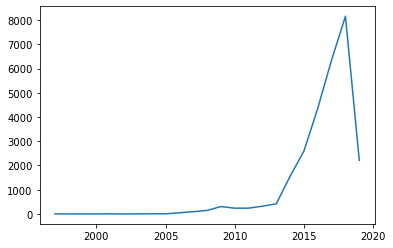

In [53]:
df['year'] = pd.to_datetime(df['release_date']).dt.year
games_released = df['year'].value_counts()
df['year'].value_counts().sort_index().plot(kind="line")

Disini tercatat bahwa pada tahun 2018 banyak game baru yang dirilis oleh pihak developer game yang memungkinkan pada tahun tersebut banyak user yang memainkan game dan pada tanggal "2018-07-13" terdapat 64 game yang dirilis

In [55]:
df['user'] = df['owner_median']*df['price']
df['game'] = df['name']
user_owners = df[['game','user']].groupby('game').sum()
print('Jumlah pemilik game: {}'.format(np.round(user_owners['user'].mean())))

Jumlah pemilik game: 1141749.0


In [56]:
t_stat,p_val = stats.ttest_1samp(user_owners.user, 1141749)
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.4999993785180568
t-statistics: -1.5578386182328022e-06


c:\Users\Intel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


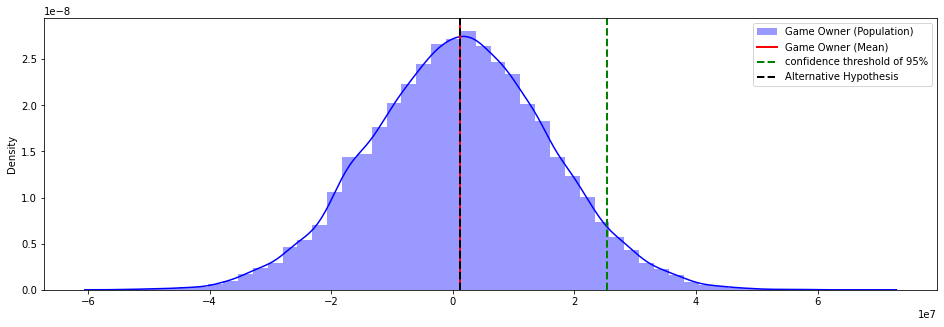

In [58]:
user_owners_pop = np.random.normal(user_owners.user.mean(), user_owners.user.std(), 28000)

ci = stats.norm.interval(0.90, user_owners.user.mean(), user_owners.user.std())

plt.figure(figsize=(16,5))
sns.distplot(user_owners_pop, label='Game Owner (Population)', color='blue')
plt.axvline(user_owners.user.mean(), color='red', linewidth=2, label='Game Owner (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(user_owners_pop.mean() + t_stat*user_owners_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

# Pengambilan Kesimpulan

Kesimpulan dari data diatas bahwa game dengan genre "Action;Indie" lebih banyak peminatnya, sedangkan untuk game "The Abbey of Crime Extensum" lebih seringing dimainkan dengan rata-rata bermain "190625" meskipun game tersebut paling sering dimainkan namun game tersebut bukan lah game yang banyak pemiliknya, sedangkan game dengan paling banyak pemiliknya merupakan game "Dota 2" dimana total pemiliknya adalah "150000000" dan harga pada game juga berpengaruh pada banyaknya user memiliki game tersebut.
Untuk game yang memiliki rating pasitifnya tinggi adalah "Counter-Strike: Global Offensive", sedangkan developer "Choice of Games" merupakan developer yang paling sering merilis game.